<a href="https://colab.research.google.com/github/Cralsic123/TRINIT_COMBINATRIX_ML03/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
price = pd.read_csv("price.csv")

In [3]:
data.head(10)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
price.head(5)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [5]:
# checking the data shape
data.shape

(2200, 8)

In [6]:
# dropping duplicate
data.drop_duplicates()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
# checking if there are null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
import plotly.express as px

In [10]:
fig = px.box(data, y="N", points="all")
fig.show()

In [11]:
fig = px.box(data, y="P", points="all")
fig.show()

In [12]:
fig = px.box(data, y="K", points="all")
fig.show()

In [ ]:
# removing all outliers

In [15]:
def del_out(data1, str):
    df_boston = data1
    df_boston.columns = df_boston.columns
    df_boston.head()

    Q1 = np.percentile(df_boston[str], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_boston[str], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1
    
    print("old Shape: ", df_boston.shape)

    upper = np.where(df_boston[str] >= (Q3+1.5*IQR))
    lower = np.where(df_boston[str] <= (Q1 - 1.5*IQR))

    df_boston.drop(upper[0], inplace = True)
    df_boston.drop(lower[0], inplace = True)

    print("New shape: ", df_boston.shape)
    return df_boston

In [16]:
data = del_out(data, "rainfall")
data = del_out(data, "K")


old Shape:  (2200, 8)
New shape:  (2101, 8)
old Shape:  (2101, 8)
New shape:  (1901, 8)


now we will implement correlation

In [17]:
#import random
#from Ipython.core.display import update_display

In [20]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.184771,-0.098295,0.040729,0.156171,0.070917,0.073291
P,-0.184771,1.000000,0.693499,-0.068998,-0.182599,-0.144033,-0.110974
K,-0.098295,0.693499,1.000000,-0.153272,0.145454,-0.142894,-0.029668
temperature,0.040729,-0.068998,-0.153272,1.000000,0.253686,0.005799,-0.005157
humidity,0.156171,-0.182599,0.145454,0.253686,1.000000,-0.011605,0.075633
ph,0.070917,-0.144033,-0.142894,0.005799,-0.011605,1.000000,-0.153301
rainfall,0.073291,-0.110974,-0.029668,-0.005157,0.075633,-0.153301,1.000000


In [21]:
# now we will create a correlation heatmap

<function matplotlib.pyplot.show(*args, **kw)>

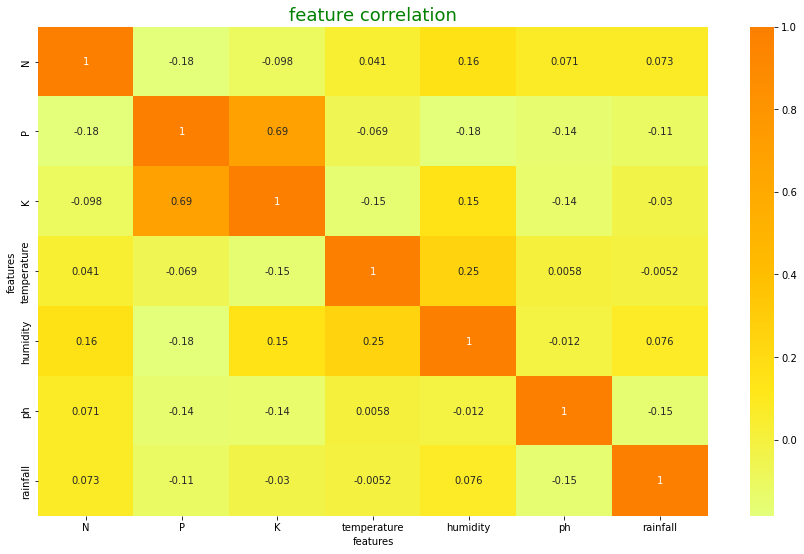

In [22]:
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel = 'features')
ax.set(ylabel = 'features')

plt.title("feature correlation", fontsize = 18, c="green")
plt.show

In [23]:
X = data.drop('label',axis = 1)
Y = data['label']

# first trying to see through 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,shuffle=True,random_state=0)

In [25]:
from sklearn.metrics import accuracy_score

In [29]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random forest classifier Accuracy:", accuracy)

Random forest classifier Accuracy: 0.989492119089317


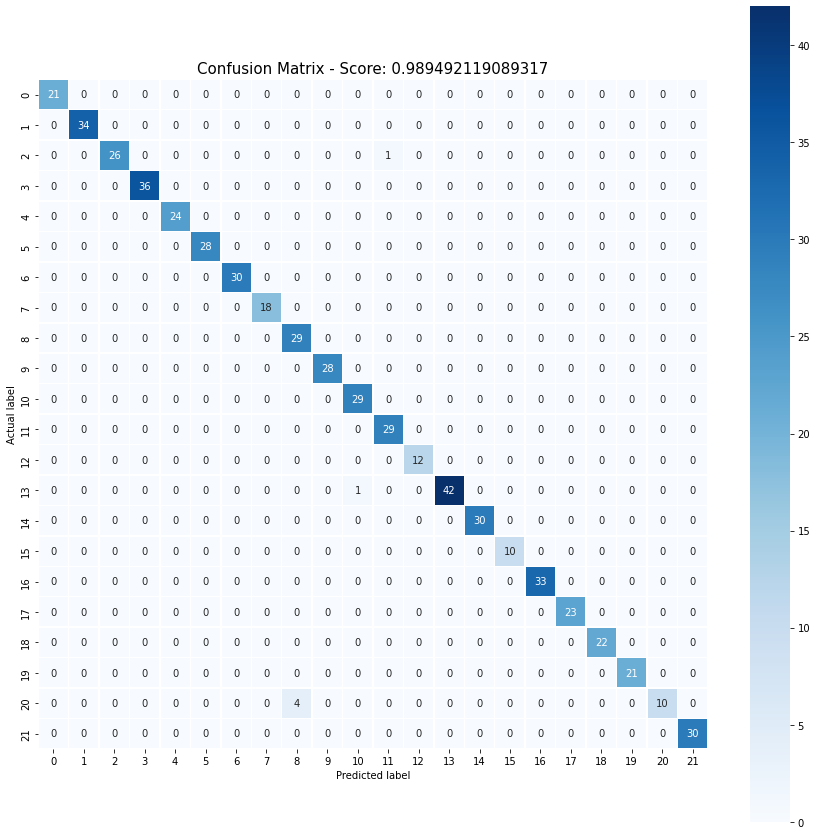

In [31]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot = True, fmt=".0f", linewidths = .5, square = True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
sam_title = "Confusion Matrix - Score: "+ str(accuracy_score(y_test,y_pred))
plt.title(sam_title,size = 15);
plt.show()

In [49]:

x_test[3:4]

,N,P,K,temperature,humidity,ph,rainfall
153,60,38,17,18.41933,64.235803,6.474477,76.413124


In [44]:
def prediction(a,b,c,d,e,f,g):
    result = clf.predict([[a,b,c,d,e,f,g]])
    return result

In [50]:
result1 = prediction(60,	38,	17,	18.41933,	64.235803,	6.474477,	76.413124)
#'22','17','5','24.121887','90.7235','6.945563','102.835632'
print(result1)

['maize']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [51]:
y_test[3:4]

153    maize
Name: label, dtype: object